#Medical Data Visualizer

A short analysis of data taken from medical examinations that explores the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['medical_examination.csv']))

Saving medical_examination.csv to medical_examination.csv


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000




---



First, we calculate BMI using the height and weight to add an 'overweight' column

In [ ]:
df.loc[(df['weight'] / ((df['height'] / 100) ** 2)) > 25, 'overweight'] = 1
df.loc[(df['weight'] / ((df['height'] / 100) ** 2)) <= 25, 'overweight'] = 0

---

Next, we normalize the data by making 0 always good and 1 always bad. (Making changes to the 'cholesterol' and 'glucose' columns)

In [ ]:
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1

---

Next, we convert the data into long format and create a chart that shows the value counts of the categorical features, separated by 'Cardio'


In [ ]:
df_cat = pd.melt(df, id_vars = 'cardio', value_vars = ('active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'))

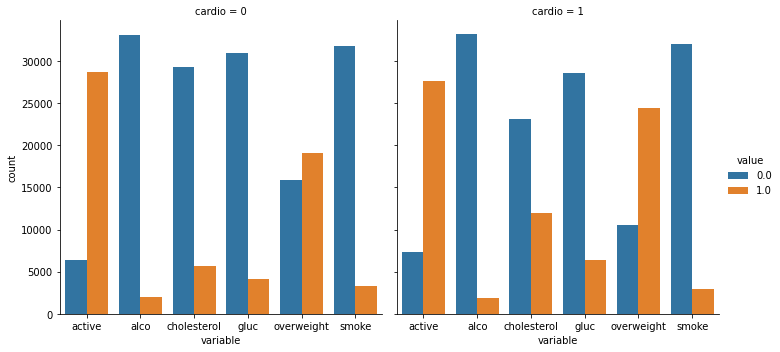

In [ ]:
g = sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio")

---

Now we clean the data, filtering out patient segments that represent incorrect / outlier data:
*   diastolic pressure is higher then systolic
*   height is less than the 2.5th percentile
*   height is more than the 97.5th percentile
*   weight is less than the 2.5th percentile
*   weight is more than the 97.5th percentile



In [ ]:
df_heat = df.loc[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

In [ ]:
df_heat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57717 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           57717 non-null  int64  
 1   age          57717 non-null  int64  
 2   gender       57717 non-null  int64  
 3   height       57717 non-null  int64  
 4   weight       57717 non-null  float64
 5   ap_hi        57717 non-null  int64  
 6   ap_lo        57717 non-null  int64  
 7   cholesterol  57717 non-null  int64  
 8   gluc         57717 non-null  int64  
 9   smoke        57717 non-null  int64  
 10  alco         57717 non-null  int64  
 11  active       57717 non-null  int64  
 12  cardio       57717 non-null  int64  
 13  overweight   57717 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 6.6 MB


The dataframe now contains 62784 rows of cleaned data, which we'll use to create a correlation matrix

In [ ]:
corr = df_heat.corr()
mask = np.triu(np.ones(corr.shape)).astype(np.bool)

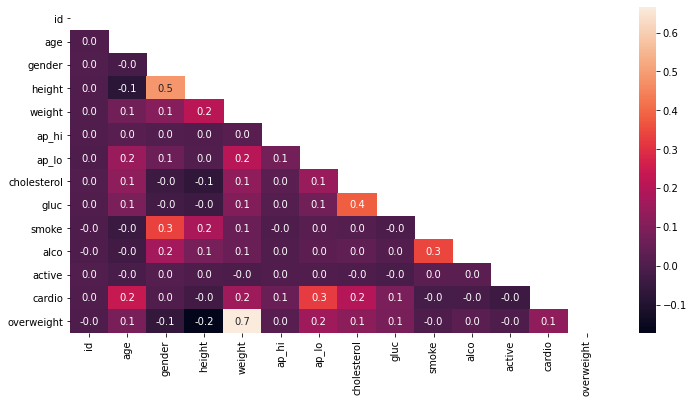

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f')

The strongest non-trivial correlation is between blood glucose level and cholesterol level.